In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay
import seaborn as sns

from IPython.display import display, HTML
from MA_PREDICTOR.car import get_abnormal_return, calculate_car, calculate_ar
from MA_PREDICTOR.global_vars import STOCKS, MARKET
from MA_PREDICTOR.data import add_car

# Data

In [4]:
# Get data

detailed_data = pd.read_csv('../MA_PREDICTOR/data/ma_detailed_data_car_clean.csv')
detailed_data.columns

Index(['id', 'acquiror_name', 'target_name', 'announcement_date',
       'target_status', 'acquisition_count', 'shares_at_announcement', 'car_3',
       'car_5', 'car_10', 'month', 'rel_deal_value', 'cross_border',
       'relatedness', 'economic_sector_ac', 'business_sector_ac',
       'economic_sector_target', 'business_sector_target', 'cluster_category',
       'a_fin_adv_count', 't_fin_adv_count', 'shares_acquired',
       'consideration_offered', 'bidder_count', 'car_1'],
      dtype='object')

In [5]:
# Removing outliers

detailed_data_outliers = detailed_data[(detailed_data.car_1 > -0.3) & (detailed_data.car_1 < 0.3)]
detailed_data_clean = detailed_data_outliers[(detailed_data_outliers.car_10 > -0.3) & (detailed_data_outliers.car_10 < 0.3)]
detailed_data_clean

,id,acquiror_name,target_name,announcement_date,target_status,acquisition_count,shares_at_announcement,car_3,car_5,car_10,...,business_sector_ac,economic_sector_target,business_sector_target,cluster_category,a_fin_adv_count,t_fin_adv_count,shares_acquired,consideration_offered,bidder_count,car_1
0,1629274020,SuperValu Inc,Total Logistics Inc,04/01/2005,public,23,no,0.001308,0.018041,0.056428,...,Food & Drug Retailing,Industrials,Transportation,divestiture,1,0,full,Cash,1,-0.009362
1,1631278020,Fulton Financial Corp,"SVB Financial Services Inc, Sommerville,New Je...",11/01/2005,public,18,no,0.004454,0.012696,0.044807,...,Banking & Investment Services,Financials,Banking & Investment Services,asset_driven_op,0,0,full,Other,1,-0.011249
2,1631266040,Cleveland-Cliffs Inc,Portman Ltd,12/01/2005,public,8,no,0.056958,0.055917,0.016918,...,Mineral Resources,Basic Materials,Mineral Resources,divestiture,0,0,not_full,Cash,1,0.013061
3,1632555020,Colonial BancGroup Inc,"FFLC Bancorp Inc,Leesburg, Florida",18/01/2005,public,40,no,-0.010042,0.002116,0.040544,...,Banking & Investment Services,Financials,Banking & Investment Services,asset_driven_op,0,0,full,Other,1,0.060476
4,1634502020,Cimarex Energy Co,Magnum Hunter Resources Inc,26/01/2005,public,0,no,-0.082288,-0.082288,-0.061740,...,Energy - Fossil Fuels,Energy,Energy - Fossil Fuels,asset_driven_op,0,0,full,Other,1,-0.093760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,3773151020,Kinder Morgan Inc,LNG Indy LLC,16/07/2021,others,9,no,-0.045382,-0.025400,-0.054948,...,Utilities,Energy,Energy - Fossil Fuels,divestiture,0,1,full,Cash,1,-0.015629
3021,3774828020,Bill.com Holdings Inc,Invoice2go Inc,19/07/2021,others,1,no,0.122123,0.059973,0.066900,...,Software & IT Services,Technology,Software & IT Services,asset_driven_op,0,0,full,Other,1,0.088395
3022,3778220020,Rapid7 Inc,Intsights Cyber Intelligence Ltd,19/07/2021,others,6,no,0.110112,0.102726,0.120972,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Other,1,0.068755
3023,3777682020,Avery Dennison Corp,Vestcom International Inc,28/07/2021,others,21,no,0.041487,0.041487,0.016503,...,Applied Resources,Consumer Cyclicals,Cyclical Consumer Services,divestiture,1,0,full,Cash,1,0.022186


In [6]:
# Looking for Google's deals

detailed_data_clean[detailed_data_clean['acquiror_name'] == 'Google Inc']

,id,acquiror_name,target_name,announcement_date,target_status,acquisition_count,shares_at_announcement,car_3,car_5,car_10,...,business_sector_ac,economic_sector_target,business_sector_target,cluster_category,a_fin_adv_count,t_fin_adv_count,shares_acquired,consideration_offered,bidder_count,car_1
255,1795676020,Google Inc,YouTube Inc,09/10/2006,others,17,no,0.049095,0.071085,0.063328,...,Software & IT Services,Technology,Telecommunications Services,asset_driven_op,1,0,full,Other,1,0.020451
643,2096731020,Google Inc,On2 Technologies Inc,05/08/2009,public,34,no,0.012359,-0.029453,-0.032035,...,Software & IT Services,Technology,Software & IT Services,asset_driven_op,1,0,full,Other,1,0.022268
676,2125822020,Google Inc,AdMob Inc,09/11/2009,others,36,no,-0.002300,0.001990,0.031594,...,Software & IT Services,Consumer Cyclicals,Cyclical Consumer Services,asset_driven_op,0,1,full,Other,1,0.008471
712,2160270020,Google Inc,Picnik.com,01/03/2010,others,42,no,-0.060045,-0.047673,-0.060133,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Cash,1,-0.007010
737,2178518040,Google Inc,LabPixies,28/04/2010,others,47,no,-0.025422,-0.025422,-0.084360,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Cash,1,0.004679
760,2176152020,Google Inc,ITA Software Inc,01/07/2010,others,52,no,-0.058487,-0.061156,-0.071232,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Cash,1,-0.042586
1184,2438377020,Google Inc,Wildfire Interactive Inc,31/07/2012,others,95,no,0.022508,0.014793,0.058939,...,Software & IT Services,Technology,Telecommunications Services,divestiture,0,1,full,Cash,1,0.004243
1332,2493854020,Google Inc,Channel Intelligence Inc,06/02/2013,others,102,no,0.012192,0.020577,0.002066,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Cash,1,0.000458
1396,2529340040,Google Inc,Waze Ltd,11/06/2013,others,106,no,-0.028320,-0.028320,-0.016082,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Cash,1,-0.006017
1538,2601090020,Google Inc,Nest Labs Inc,13/01/2014,others,117,yes,0.018673,0.018636,0.043757,...,Software & IT Services,Industrials,Industrial & Commercial Services,divestiture,1,0,not_full,Cash,1,0.016555


# Economic Sector

## Distribution

<AxesSubplot:title={'center':'Number of deal per economic industry'}>

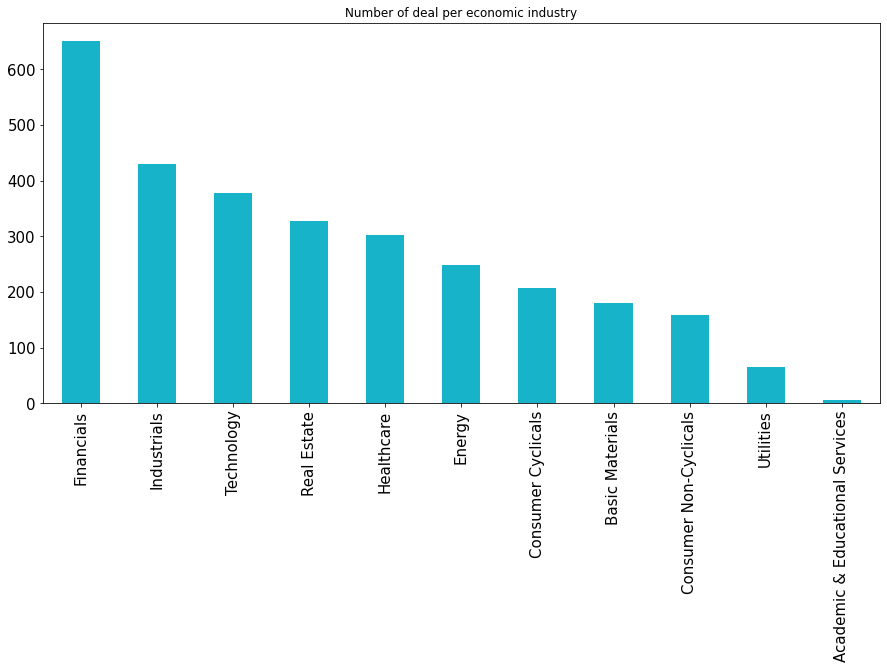

In [7]:
# Ploting the distribution of deals made per economic industry

plt.figure(figsize=(15,7))
plt.title('Number of deal per economic industry')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
detailed_data_clean['economic_sector_ac'].value_counts().plot(kind='bar', color='#17B3C8')

## 1 day

In [8]:
# Creating a reduced dataset with only the car on a event horizon of 1 day before and 1 day after the announcment

data_economic = detailed_data_clean.groupby('economic_sector_ac')['car_1'].mean()
data_economic = pd.DataFrame(data_economic)
data_economic = data_economic.reset_index()
data_economic

,economic_sector_ac,car_1
0,Academic & Educational Services,0.070568
1,Basic Materials,0.010160
2,Consumer Cyclicals,0.011849
3,Consumer Non-Cyclicals,0.002421
4,Energy,0.004013
5,Financials,0.001167
6,Healthcare,0.010528
7,Industrials,0.008768
8,Real Estate,-0.002503
9,Technology,0.000897


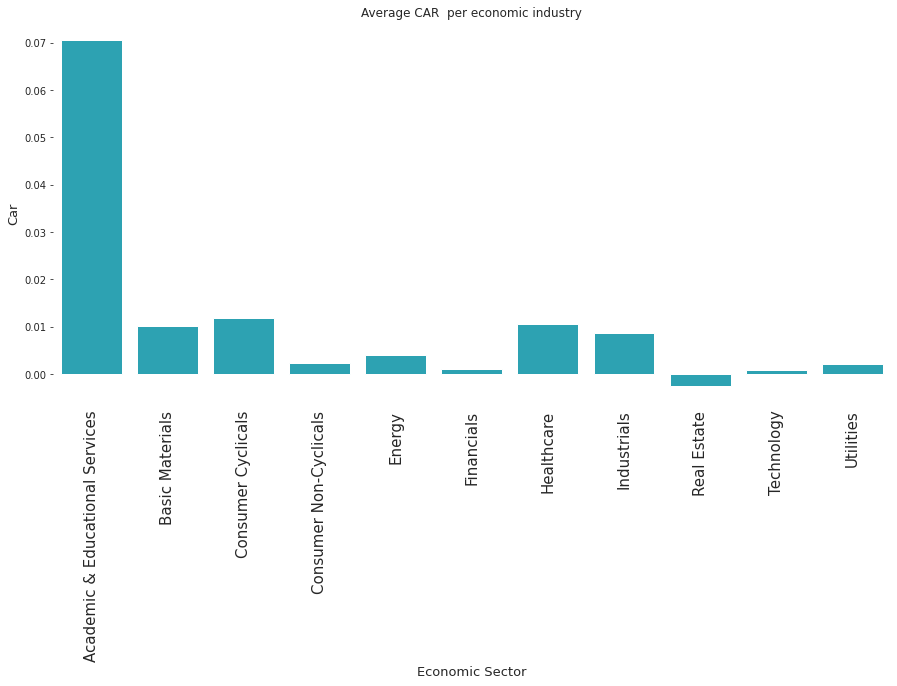

In [36]:
# Ploting the car per economic sector on a event horizon of 1 day before and 1 day after the announcment

plt.figure(figsize=(15,7))
plt.title('Average CAR  per economic industry')
plt.xticks(fontsize=15, rotation=90)
sns.set_style("ticks")
ax = sns.barplot(data=data_economic,x='economic_sector_ac', y='car_1', color='#17B3C8')
sns.despine(bottom=True, left=True)
ax.set_xlabel('Economic Sector', fontsize = 13)
ax.set_ylabel('Car', fontsize = 13)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

## 10 day

In [10]:
# Creating a reduced dataset with only the car on a event horizon of 10 day before and 10 day after the announcment 

data_economic_10 = detailed_data_clean.groupby('economic_sector_ac')['car_10'].mean()
data_economic_10 = pd.DataFrame(data_economic_10)
data_economic_10 = data_economic_10.reset_index()
data_economic_10

,economic_sector_ac,car_10
0,Academic & Educational Services,0.108923
1,Basic Materials,0.015679
2,Consumer Cyclicals,0.004448
3,Consumer Non-Cyclicals,-0.001286
4,Energy,0.011157
5,Financials,0.005601
6,Healthcare,0.009511
7,Industrials,0.012322
8,Real Estate,-0.001825
9,Technology,0.004442


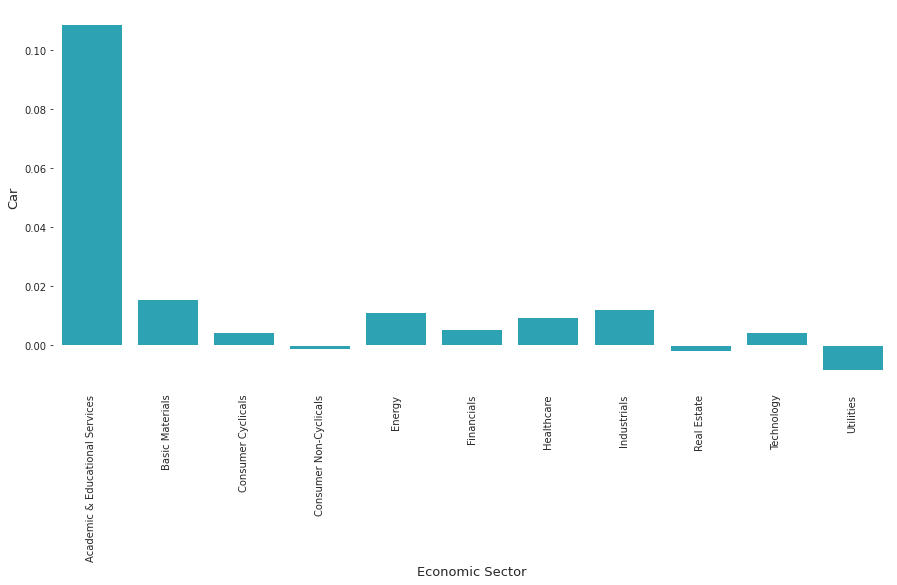

In [35]:
# Ploting the car per economic sector on a event horizon of 10 day before and 10 day after the announcment

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
sns.set_style("ticks")
ax = sns.barplot(data=data_economic_10,x='economic_sector_ac', y='car_10', color='#17B3C8')
sns.despine(bottom=True, left=True)
ax.set_xlabel('Economic Sector', fontsize = 13)
ax.set_ylabel('Car', fontsize = 13)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

# Business Sector

## Distribution

<AxesSubplot:>

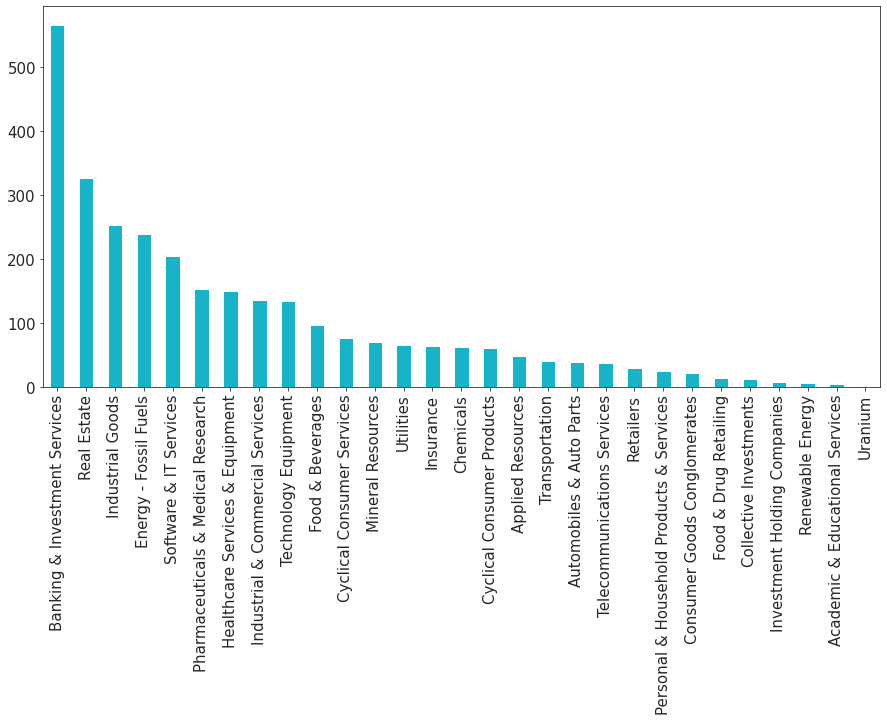

In [12]:
# Ploting the distribution of deals made per business sector

plt.figure(figsize=(15,7))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
detailed_data_clean['business_sector_ac'].value_counts().plot(kind='bar', color='#17B3C8')

## 1 day

In [13]:
# Creating a reduced dataset with only the car on a event horizon of 1 day before and 1 day after the announcment 

data_business = detailed_data_clean.groupby('business_sector_ac')['car_1'].mean()
data_business = pd.DataFrame(data_business)
data_business = data_business.reset_index()
data_business

,business_sector_ac,car_1
0,Academic & Educational Services,0.070568
1,Applied Resources,0.007570
2,Automobiles & Auto Parts,0.004960
3,Banking & Investment Services,0.002827
4,Chemicals,0.015520
5,Collective Investments,-0.033268
6,Consumer Goods Conglomerates,0.006539
7,Cyclical Consumer Products,0.010310
8,Cyclical Consumer Services,0.019713
9,Energy - Fossil Fuels,0.003237


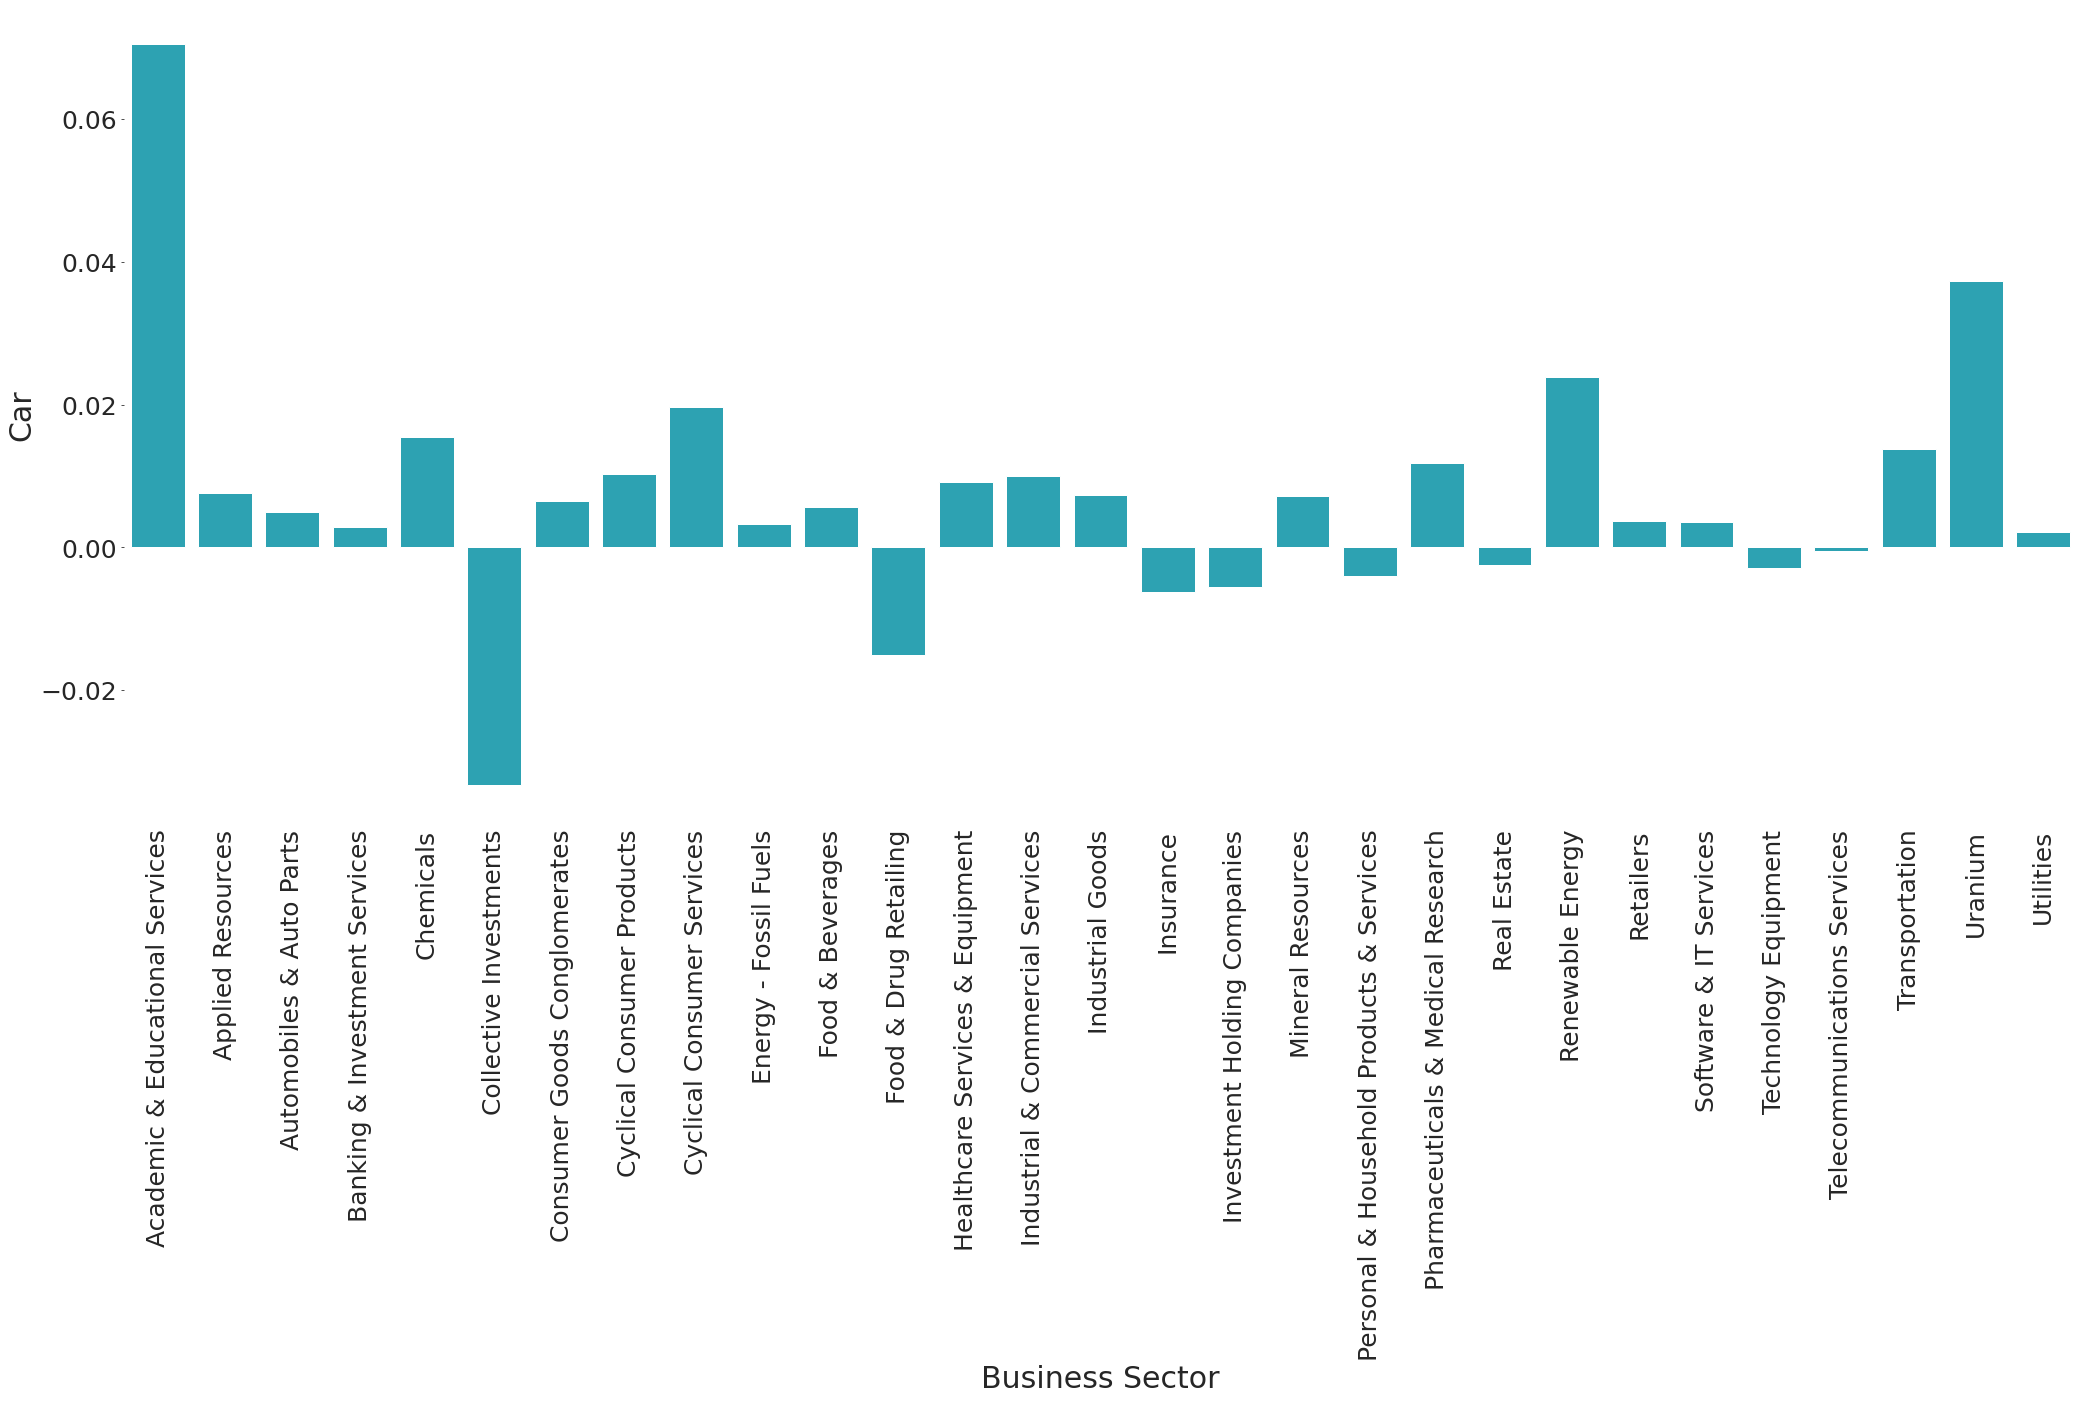

In [29]:
# Ploting the car per business sector on a event horizon of 1 day before and 1 day after the announcment

plt.figure(figsize=(35,15))
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
sns.set_style("ticks")
ax = sns.barplot(data=data_business,x='business_sector_ac', y='car_1', color='#17B3C8')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.set_xlabel('Business Sector', fontsize = 30)
ax.set_ylabel('Car', fontsize = 30)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

## 10 day

In [15]:
# Creating a reduced dataset with only the car on a event horizon of 1 day before and 1 day after the announcment 

data_business_10 = detailed_data_clean.groupby('business_sector_ac')['car_10'].mean()
data_business_10 = pd.DataFrame(data_business_10)
data_business_10 = data_business_10.reset_index()
data_business_10

,business_sector_ac,car_10
0,Academic & Educational Services,0.108923
1,Applied Resources,0.003828
2,Automobiles & Auto Parts,-0.011340
3,Banking & Investment Services,0.006482
4,Chemicals,0.016328
5,Collective Investments,0.011737
6,Consumer Goods Conglomerates,0.009850
7,Cyclical Consumer Products,0.012787
8,Cyclical Consumer Services,0.001681
9,Energy - Fossil Fuels,0.008851


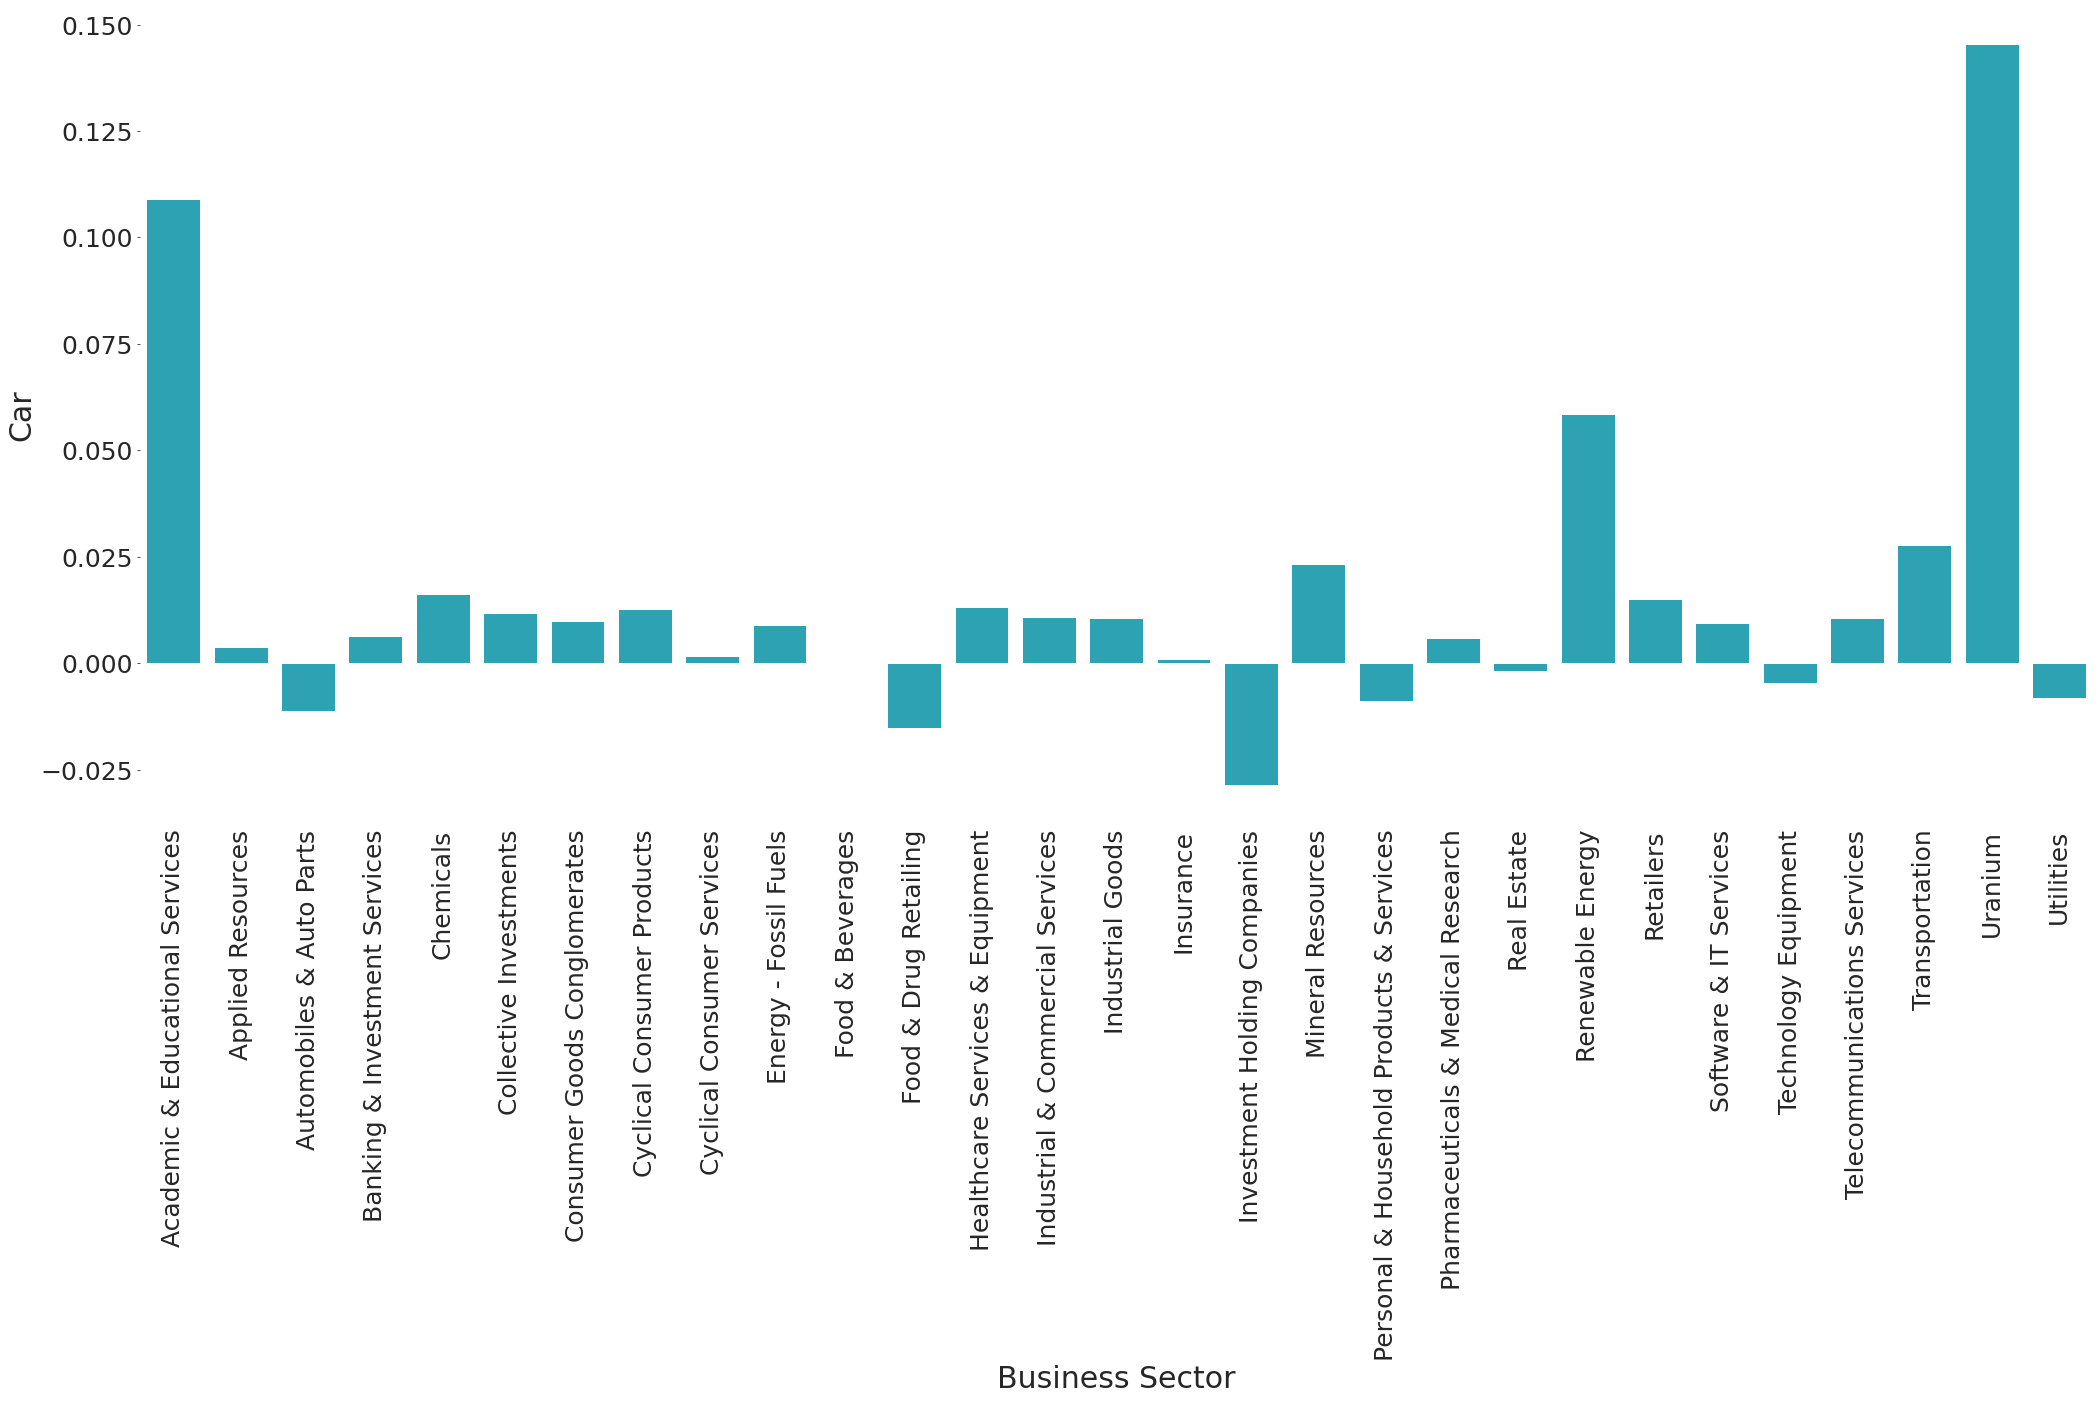

In [30]:
# Ploting the car per business sector on a event horizon of 10 day before and 10 day after the announcment

plt.figure(figsize=(35,15))
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
sns.set_style("darkgrid")
ax = sns.barplot(data=data_business_10,x='business_sector_ac', y='car_10', color='#17B3C8')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.set_xlabel('Business Sector', fontsize = 30)
ax.set_ylabel('Car', fontsize = 30)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')